# Capstone project-Neighborhood Clustering(using K means)

## Part 1

## 1. Description of the problem and a discussion of the background.

### Comparison between two cities: Toronto and New York city

## Background and Introduction

New York City (NYC) is the most populous city and the most densely populated major city in the United States. It is described as the cultural, financial, and media capital of the world,
Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 as of 2016. C Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world

Toronto and New York city are both famous and important cities of their countries. The aim of this project is to find out the similarity and dissimilarity by comparing the neighborhoods of the two cities.To help people better understand the neighborhoods of two cities.

### Target audience

People who want to work in big cities
Companies which want to set up a branch

## 2. Initial Data Preparation

<font color=blue> Obtain the Data </font>

1.a. Name of the neighborhoods from web scrapping

1.b. Use Foresquare Data to obtain info about different venues.

<font color=blue> Data Visualization and Some Simple Statistical Analysis. </font>

<font color=blue> Analysis Using Clustering, Specially K-Means Clustering. </font>

3.a. Clustering.

3.b. Visualization using Chloropleth Map

<font color=blue> Compare the Neighborhoods. </font>

<font color=blue> Inference From these Results and related Conclusions. </font>

### Data Processing
2.1. Get The list of postcode, neighborhoods from Wikipedia and https://geo.nyu.edu/catalog/nyu_2451_34572

2.2. Processing the data

2.3. Check and Compare with Google Search and Refine if Necessary

## Part 2

## 3. Exploratory Data Analysis

In [25]:
# Installing and importing libraries
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


### Toronto Data

In [26]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postcode,Borough,Neighborhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Downtown Toronto,Queen's Park
M8A,Not assigned,Not assigned
M9A,Queen's Park,Not assigned


In [27]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [28]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Queen's Park,Queen's Park
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [29]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [30]:
# Merge two tables
df_data_0.rename(columns={'Postal Code':'Postcode'},inplace=True)
df3 = pd.merge(df2,df_data_0,on='Postcode')
df3.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


In [31]:
# Getting all the rows from the data frame which contains Toronto in their Borough
df_toronto = df3[df3['Borough'].str.contains('Toronto',regex=False)]
df_toronto

,Postcode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
31,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259


## New York city data

In [32]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [33]:
import json

In [34]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [35]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [36]:
neighborhoods_data = newyork_data['features']

In [37]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [38]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [39]:
df_ny=neighborhoods
df_ny.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [40]:
df_m= neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
df_m.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### Get the longitude and latitude of New York city and Toronto

In [42]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_ny = location.latitude
longitude_ny = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_ny, longitude_ny))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [43]:
address = 'Toronto'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_t, longitude_t))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


#### Map visualizing

In [44]:
# New york city
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [45]:
# Toronto
map_toronto = folium.Map(location=[latitude_t, longitude_t], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### As it can be seen from the maps. The neighborhoods density of New York city is much higher than that of Toronto.

### Map of Mahattan and Toronto Boroughs

In [47]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_m['Latitude'], df_m['Longitude'], df_m['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [48]:
# Toronto
map_to = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

#### Exploring venues with foursquare

In [49]:
CLIENT_ID = 'YPRHP3HXLL1H2FQUFC1WBMCFRGQEAEMJUTKA1KB43YF5NXEM' # your Foursquare ID
CLIENT_SECRET = '0LWEEJM4TL5GIIA3WXUR1DKEC0SYEGUMHZ3RH1BHPEVUXXYM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YPRHP3HXLL1H2FQUFC1WBMCFRGQEAEMJUTKA1KB43YF5NXEM
CLIENT_SECRET:0LWEEJM4TL5GIIA3WXUR1DKEC0SYEGUMHZ3RH1BHPEVUXXYM


#### Manhattan neighborhoods

In [50]:
LIMIT = 100 
radius = 500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
manhattan_venues = getNearbyVenues(names=df_m['Neighborhood'],
                                   latitudes=df_m['Latitude'],
                                   longitudes=df_m['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [52]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3312, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


#### Toronto Neighborhoods

In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [54]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Harbourfront
Queen's Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [55]:
print(toronto_venues.shape)
toronto_venues.head()

(1722, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653191,-79.357947,Gym / Fitness Center
3,Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


### Exploring venue frequency in Manhattan and Toronto

In [56]:
# create a dataframe of top 10 categories
manhattan_venues_10 = manhattan_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
manhattan_venues_10=manhattan_venues_10.reset_index()
#Tokyo_5_Dist_Venues_Top10

manhattan_venues_10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
manhattan_venues_10

,Venue Category,Frequency
0,Coffee Shop,134
1,Italian Restaurant,130
2,American Restaurant,80
3,Pizza Place,76
4,Café,76
5,Bakery,75
6,Cocktail Bar,65
7,Park,65
8,Hotel,61
9,Bar,60


In [57]:
# create a dataframe of top 10 categories
toronto_venues_10 = toronto_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
toronto_venues_10=toronto_venues_10.reset_index()
#Tokyo_5_Dist_Venues_Top10

toronto_venues_10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
toronto_venues_10

,Venue Category,Frequency
0,Coffee Shop,160
1,Café,91
2,Restaurant,52
3,Italian Restaurant,44
4,Bakery,40
5,Bar,39
6,Hotel,37
7,Park,37
8,Pizza Place,29
9,Japanese Restaurant,26


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


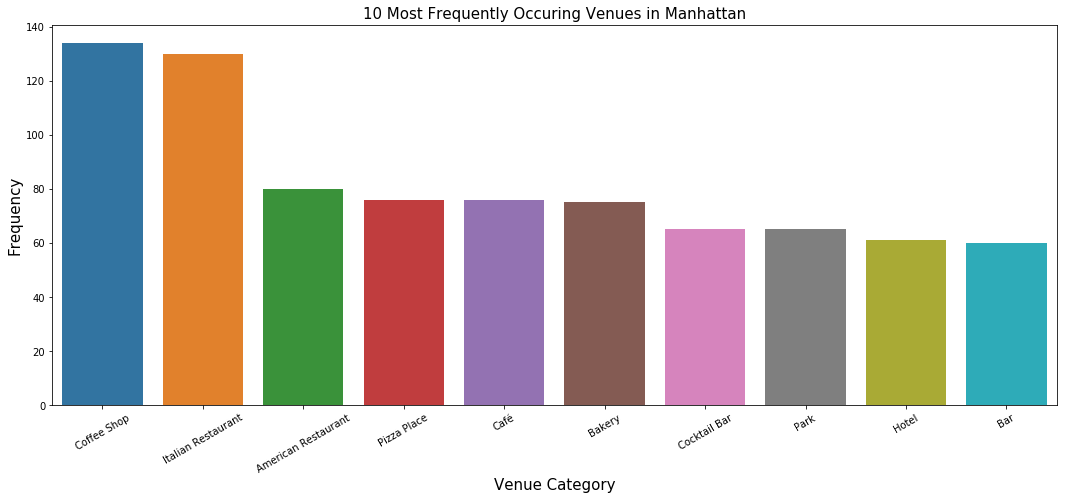

In [59]:
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=manhattan_venues_10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Manhattan', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

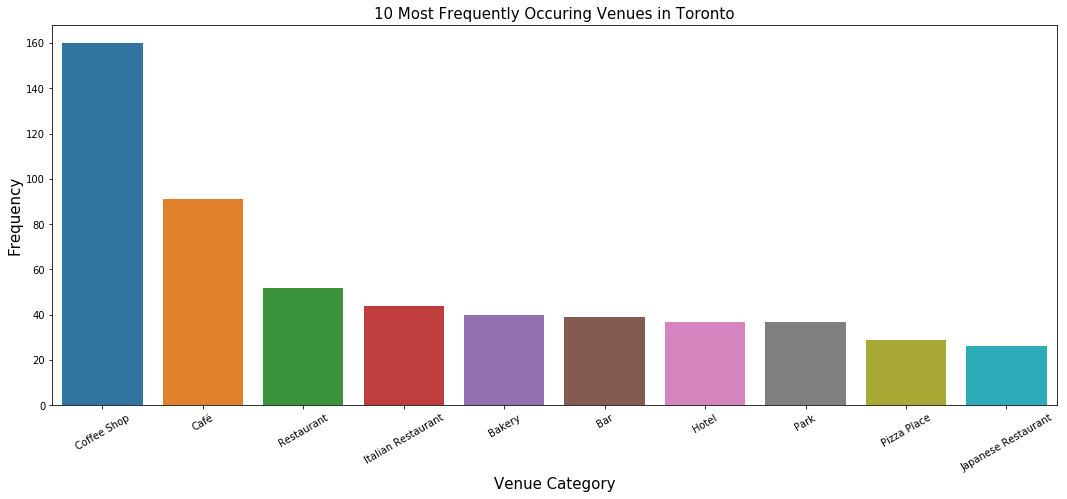

In [60]:
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=toronto_venues_10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Toronto', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

### As in the center of big cities, Manhattan and Toronto both provide good amenities for visitors and local people. But for Toronto the frequency of coffee shop is much higher than resturants and other venue categories. For manhattan, the frequency of resturants is highest especially Itallian resturants. The frequency of venue categories in Manhattan is more even than in Toronto.

### Neighborhood Clustering


#### New York City

In [61]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
manhattan_onehot.shape

(3312, 337)

In [63]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.010309,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030928,0.000000,0.020619,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.010000,0.00,0.00,0.000000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.010000,0.030000,0.000000,0.010000,0.030000
2,Central Harlem,0.000000,0.00,0.00,0.046512,0.046512,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.020000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.030000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.030000,0.01,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.010000,0.010000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.020000,0.01,0.00,0.010000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.010000,0.00,0.00,0.000000,0.050000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.040000,0.000000,0.010000,0.000000


#### Print each neighborhood along with the top 5 most common venues

In [64]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
            venue  freq
0            Park  0.06
1           Hotel  0.05
2     Coffee Shop  0.05
3             Gym  0.03
4  Clothing Store  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.07
1     Pizza Place  0.05
2  Cosmetics Shop  0.04
3     Yoga Studio  0.03
4             Gym  0.03


----Central Harlem----
                 venue  freq
0                  Bar  0.05
1   Chinese Restaurant  0.05
2   African Restaurant  0.05
3  American Restaurant  0.05
4   Seafood Restaurant  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2              Bakery  0.05
3      Ice Cream Shop  0.04
4               Hotel  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1         Cocktail Bar  0.05
2  American Restaurant  0.04
3                  Spa  0.03
4    Hotpot Restaurant  0.03


----Civic Center----
                  venue  freq
0    Italian Restaurant  0.05


In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Memorial Site,Wine Shop,Gym,Clothing Store,Italian Restaurant,Shopping Mall,Boat or Ferry
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Japanese Restaurant,Gym,Grocery Store,French Restaurant,Yoga Studio,Café,Bookstore
2,Central Harlem,Cosmetics Shop,Bar,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Seafood Restaurant,Boutique,Library,Gym / Fitness Center
3,Chelsea,Coffee Shop,Italian Restaurant,Bakery,Ice Cream Shop,Nightclub,Seafood Restaurant,Theater,Hotel,American Restaurant,Bookstore
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Spa,Optical Shop,Vietnamese Restaurant,Hotpot Restaurant,Salon / Barbershop,Bakery,Coffee Shop


In [67]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 0, 0, 1, 0, 0, 4, 0, 0], dtype=int32)

In [68]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = df_m

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Coffee Shop,Sandwich Place,Yoga Studio,Bank,Big Box Store,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Deli / Bodega
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Spa,Optical Shop,Vietnamese Restaurant,Hotpot Restaurant,Salon / Barbershop,Bakery,Coffee Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Coffee Shop,Pizza Place,Mexican Restaurant,Liquor Store,Latin American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,4,Lounge,Mexican Restaurant,Café,Restaurant,Bakery,Pizza Place,Wine Bar,Pharmacy,Park,Deli / Bodega
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Coffee Shop,Mexican Restaurant,Café,Deli / Bodega,Sandwich Place,Indian Restaurant,Sushi Restaurant,Park,Yoga Studio


In [69]:
# create map
map_clusters_ny = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_ny)
       
map_clusters_ny

### Examine Clusters

#### Cluster 1

In [70]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,Cosmetics Shop,Bar,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Seafood Restaurant,Boutique,Library,Gym / Fitness Center
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,Gym / Fitness Center,Juice Bar,French Restaurant,Hotel,Sushi Restaurant
13,Lincoln Square,Plaza,Italian Restaurant,Café,Concert Hall,Theater,Gym / Fitness Center,Performing Arts Venue,French Restaurant,American Restaurant,Indie Movie Theater
14,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,Coffee Shop,American Restaurant,Hotel,Wine Shop,Spa,Gym,Sandwich Place
17,Chelsea,Coffee Shop,Italian Restaurant,Bakery,Ice Cream Shop,Nightclub,Seafood Restaurant,Theater,Hotel,American Restaurant,Bookstore
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Café,Gym,French Restaurant,Indian Restaurant,Seafood Restaurant,Coffee Shop,Dessert Shop
19,East Village,Bar,Wine Bar,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Pizza Place,Chinese Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop
21,Tribeca,Italian Restaurant,American Restaurant,Park,Café,Spa,Coffee Shop,Greek Restaurant,Wine Shop,Wine Bar,Bakery
24,West Village,Italian Restaurant,New American Restaurant,Cosmetics Shop,Park,American Restaurant,Cocktail Bar,Wine Bar,Jazz Club,Coffee Shop,Theater
27,Gramercy,Italian Restaurant,Bar,Bagel Shop,Pizza Place,Cocktail Bar,American Restaurant,Wine Shop,Thai Restaurant,Grocery Store,Comedy Club


#### Cluster 2

In [71]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Spa,Optical Shop,Vietnamese Restaurant,Hotpot Restaurant,Salon / Barbershop,Bakery,Coffee Shop
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Café,Burger Joint,Sporting Goods Shop,Sushi Restaurant,Gym,Gym / Fitness Center
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Coffee Shop,Bakery,Café,Indian Restaurant,Restaurant,Pub,Pizza Place
15,Midtown,Hotel,Coffee Shop,Clothing Store,Sporting Goods Shop,Theater,Bookstore,Spa,Food Truck,Bakery,Steakhouse
16,Murray Hill,Sandwich Place,Coffee Shop,Hotel,American Restaurant,Japanese Restaurant,Italian Restaurant,Bar,Gym / Fitness Center,Gym,Cocktail Bar
22,Little Italy,Italian Restaurant,Bakery,Café,Bubble Tea Shop,Clothing Store,Cocktail Bar,Sandwich Place,Salon / Barbershop,Mediterranean Restaurant,Japanese Restaurant
23,Soho,Clothing Store,Boutique,Art Gallery,Shoe Store,Women's Store,Italian Restaurant,Men's Store,Bakery,Sporting Goods Shop,Mediterranean Restaurant
30,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Japanese Restaurant,Gym,Grocery Store,French Restaurant,Yoga Studio,Café,Bookstore
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Gym,Coffee Shop,Indian Restaurant,American Restaurant,Bakery,Pilates Studio,Mexican Restaurant
38,Flatiron,Yoga Studio,American Restaurant,Japanese Restaurant,Café,Gym / Fitness Center,Cosmetics Shop,Salon / Barbershop,New American Restaurant,Dessert Shop,Cycle Studio


#### Cluster 3

In [72]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Bar,Baseball Field,Heliport,Gas Station,Farmers Market,German Restaurant,Gym / Fitness Center,Basketball Court


#### Cluster 4

In [73]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Sandwich Place,Yoga Studio,Bank,Big Box Store,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Deli / Bodega
11,Roosevelt Island,Deli / Bodega,Park,Sandwich Place,Coffee Shop,School,Baseball Field,Liquor Store,Scenic Lookout,Bubble Tea Shop,Gym / Fitness Center
26,Morningside Heights,Park,American Restaurant,Coffee Shop,Bookstore,Deli / Bodega,Burger Joint,Sandwich Place,Food Truck,Pizza Place,Outdoor Sculpture
28,Battery Park City,Park,Hotel,Coffee Shop,Memorial Site,Wine Shop,Gym,Clothing Store,Italian Restaurant,Shopping Mall,Boat or Ferry


#### Cluster 5

In [74]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Coffee Shop,Pizza Place,Mexican Restaurant,Liquor Store,Latin American Restaurant
3,Inwood,Lounge,Mexican Restaurant,Café,Restaurant,Bakery,Pizza Place,Wine Bar,Pharmacy,Park,Deli / Bodega
4,Hamilton Heights,Pizza Place,Coffee Shop,Mexican Restaurant,Café,Deli / Bodega,Sandwich Place,Indian Restaurant,Sushi Restaurant,Park,Yoga Studio
5,Manhattanville,Coffee Shop,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Seafood Restaurant,Park,Ramen Restaurant,Boutique,Supermarket,Spanish Restaurant
7,East Harlem,Mexican Restaurant,Deli / Bodega,Thai Restaurant,Latin American Restaurant,Bakery,Burger Joint,Dance Studio,Steakhouse,Street Art,Spa
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Pizza Place,Japanese Restaurant,Diner,Sushi Restaurant,Bakery
20,Lower East Side,Pizza Place,Café,Coffee Shop,Japanese Restaurant,Art Gallery,Ramen Restaurant,Bakery,Chinese Restaurant,Cocktail Bar,Park
25,Manhattan Valley,Bar,Indian Restaurant,Coffee Shop,Yoga Studio,Pizza Place,Café,Park,Mexican Restaurant,Juice Bar,Hostel
36,Tudor City,Mexican Restaurant,Park,Café,Greek Restaurant,Pizza Place,Deli / Bodega,Dog Run,Sushi Restaurant,Gym,Garden


### Toronto

In [75]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
toronto_onehot.shape

(1722, 237)

In [77]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.020000,...,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000
1,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,...,0.000000,0.00000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.0625,0.0625,0.0625,0.0625,0.1875,0.0625,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown, St. James Town",0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.011628,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.011628,...,0.000000,0.00000,0.00,0.011628,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,...,0.000000,0.00000,0.00,0.055556,0.000000,0.055556,0.011111,0.000000,0.000000,0.011111
8,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.023256,0.011628,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.011628,...,0.000000,0.00000,0.00,0.000000,0.000000,0.011628,0.000000,0.011628,0.011628,0.000000


In [78]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
         venue  freq
0  Coffee Shop  0.08
1         Café  0.05
2   Steakhouse  0.04
3          Bar  0.04
4   Restaurant  0.03


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2   Cheese Shop  0.04
3          Café  0.04
4        Bakery  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0            Café  0.14
1  Breakfast Spot  0.10
2     Coffee Shop  0.10
3   Burrito Place  0.05
4         Stadium  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                  venue  freq
0    Light Rail Station  0.12
1         Garden Center  0.06
2            Restaurant  0.06
3  Fast Food Restaurant  0.06
4                   Spa  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
             venue  freq
0  Airport Service  0.19
1         Boutique  0.06
2  Harbor / Marina  0.06
3            Plane  0.06
4    B

In [79]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Bar,Restaurant,Asian Restaurant,Sushi Restaurant,Burger Joint,Thai Restaurant,Gym
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Farmers Market,Beer Bar,Bakery,Steakhouse,Café,Beach
2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Gym,Bakery,Grocery Store,Furniture / Home Store,Intersection,Italian Restaurant,Convenience Store
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Skate Park,Burrito Place,Butcher,Fast Food Restaurant,Auto Workshop,Farmers Market,Brewery,Spa,Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Bar,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,Plane,Harbor / Marina


In [81]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [82]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Mexican Restaurant,Restaurant,Café,Event Space,Shoe Store
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Gym,Park,Fried Chicken Joint,Portuguese Restaurant,Nightclub,Music Venue,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Bakery,Middle Eastern Restaurant,Restaurant,Diner,Ramen Restaurant,Plaza
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Restaurant,Hotel,Cocktail Bar,Bakery,Beer Bar,Breakfast Spot,Cosmetics Shop,Clothing Store
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Farmers Market,Beer Bar,Bakery,Steakhouse,Café,Beach
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Ice Cream Shop,Burger Joint,Chinese Restaurant,Juice Bar,Japanese Restaurant,Salad Place
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Bank,Restaurant,Baby Store,Candy Store
30,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,Coffee Shop,Café,Steakhouse,Bar,Restaurant,Asian Restaurant,Sushi Restaurant,Burger Joint,Thai Restaurant,Gym
31,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259,0,Bakery,Pharmacy,Supermarket,Bank,Bar,Café,Portuguese Restaurant,Pizza Place,Middle Eastern Restaurant,Music Venue


In [83]:
map_clusters = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'],toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Mexican Restaurant,Restaurant,Café,Event Space,Shoe Store
4,Downtown Toronto,0,Coffee Shop,Gym,Park,Fried Chicken Joint,Portuguese Restaurant,Nightclub,Music Venue,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
9,Downtown Toronto,0,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Bakery,Middle Eastern Restaurant,Restaurant,Diner,Ramen Restaurant,Plaza
15,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,Cocktail Bar,Bakery,Beer Bar,Breakfast Spot,Cosmetics Shop,Clothing Store
19,East Toronto,0,Trail,Health Food Store,Pub,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
20,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Farmers Market,Beer Bar,Bakery,Steakhouse,Café,Beach
24,Downtown Toronto,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Ice Cream Shop,Burger Joint,Chinese Restaurant,Juice Bar,Japanese Restaurant,Salad Place
25,Downtown Toronto,0,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Bank,Restaurant,Baby Store,Candy Store
30,Downtown Toronto,0,Coffee Shop,Café,Steakhouse,Bar,Restaurant,Asian Restaurant,Sushi Restaurant,Burger Joint,Thai Restaurant,Gym
31,West Toronto,0,Bakery,Pharmacy,Supermarket,Bank,Bar,Café,Portuguese Restaurant,Pizza Place,Middle Eastern Restaurant,Music Venue


In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Central Toronto,1,Park,Jewelry Store,Trail,Sushi Restaurant,Dessert Shop,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
91,Downtown Toronto,1,Park,Playground,Trail,Deli / Bodega,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Central Toronto,2,Park,Swim School,Bus Line,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Central Toronto,3,Home Service,Garden,Women's Store,Department Store,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,Central Toronto,4,Restaurant,Playground,Tennis Court,Park,Comfort Food Restaurant,Department Store,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


### Conclusion
As financial capital cities in their respective countries, Toronto and New York city show the large variety of venues and provide good city amenity. But the number of venues in Toronto is almost half of the venues in New York. The venue combination of Toronto is simpler than that of New York City. In Toronto, People like coffee shops more but people in New York like resturants more. In New York, the variety of resturants is much higher. It may indicates that New York has larger immigration variety or visitor variety.